$\textbf{DS169 - INTERNET OF THINGS} \\ \texttt{2T SY2425}$ 
# <CENTER> Sensor Activity

<CENTER> <i> Carreon &nbsp &nbsp |&nbsp &nbsp  Lucas &nbsp &nbsp |&nbsp &nbsp San Juan

# Introduction

## Dataset Source

Human Activity Recognition with Smartphones: https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones?select=train.csv

## About the Dataset

Thirty participants wearing a smartphone (Samsung Galaxy S II) on the waist do activities of daily life (ADL). Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. Dataset has been split into a 70: 30 train test csv file.

## Objective

Classify activities from one out of six movements: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING

# Data Preprocessing

## Imports

In [1]:
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Loading and Preview

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
#Displaying first 5 rows of train dataframe
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
is_null_train = train.isnull().values.any()
print(f"Does the train dataset contain any null values?: {is_null_train}")

Does the train dataset contain any null values?: False


In [6]:
#Displaying first 5 rows of test dataframe
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [8]:
is_null_test = test.isnull().values.any()
print(f"Does the test dataset contain any null values?: {is_null_test}")

Does the test dataset contain any null values?: False


## Concatenated Dataframe

In [9]:
df = pd.concat([train, test], ignore_index = True)

In [10]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.2+ MB


In [12]:
is_null_df = df.isnull().values.any()
print(f"Does the concatenated dataframe have any null values?: {is_null_df}")

Does the concatenated dataframe have any null values?: False


In [13]:
is_num_row = train.shape[0] + test.shape[0] == df.shape[0]
is_num_col = train.shape[1] == test.shape[1] == df.shape[1]

print(f"Does the concatenated dataframe have the same number of rows when train and test are combined?: {is_num_row}")
print(f"Does the concatenated dataframe have the same number of columns when train and test are combined?: {is_num_col}")

Does the concatenated dataframe have the same number of rows when train and test are combined?: True
Does the concatenated dataframe have the same number of columns when train and test are combined?: True


# Exploratory Data Analysis
Using concatenated dataframe

In [14]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


#### Data Provided by Each User

The bar chart depicts the distribution of data given by each user across several activity categories. The x-axis indicates individual users, while the y-axis represents the number of data points supplied. Each colors symbolize different activities, which are as follows: standing, sitting, laying, walking, walking_downstairs, and walking_upstairs. 

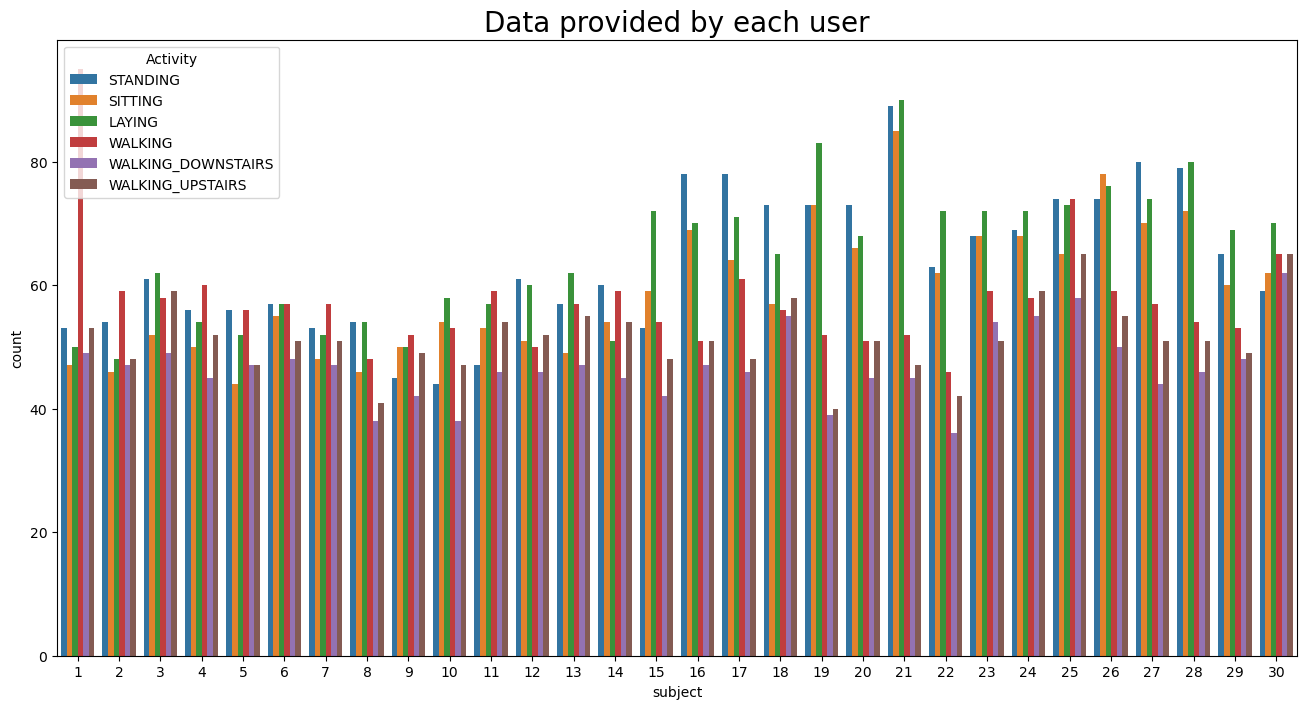

In [15]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = df)
plt.show()

#### Activity Distribution in Dataset

The bar chart shows the distribution of activity in the dataset. The x-axis indicates the categorial activity, while the y-axis shows the number of data points or the count gathered per activity. It can be observed that laying has the highest count of activity distribution corresponding that the activities made by the user are largerly scoping to laying than walking downstairs that accumulates the lowest count of activity. 

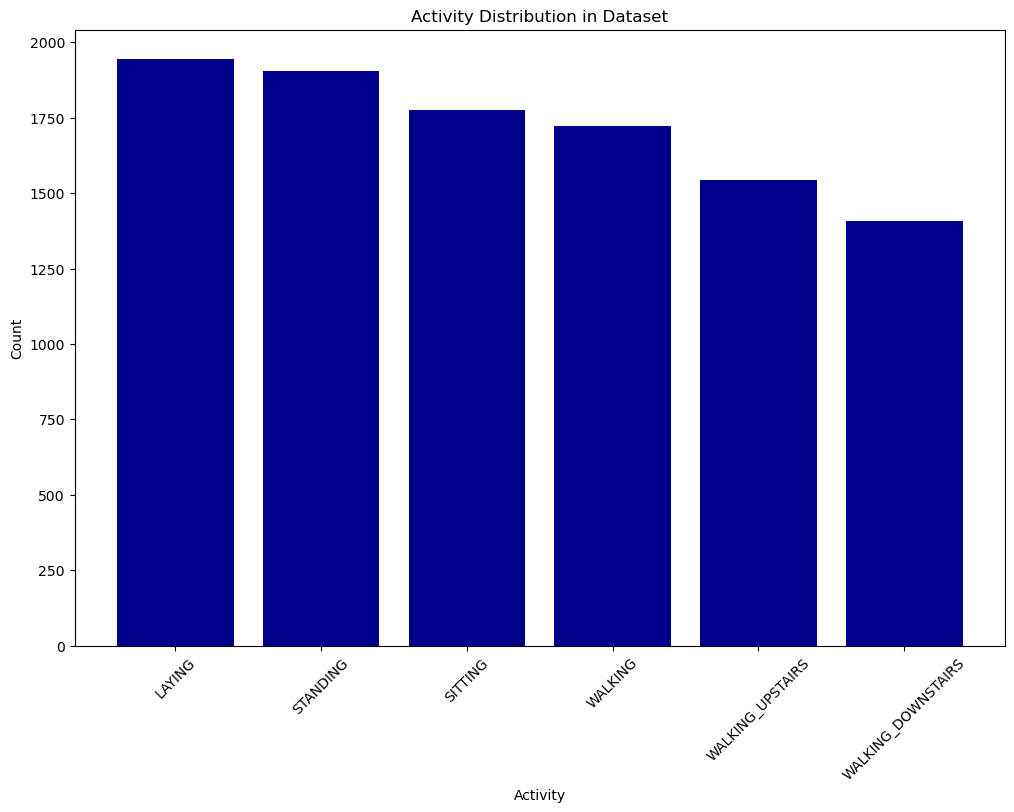

In [16]:
activity_counts = df["Activity"].value_counts()

plt.figure(figsize=(12, 8))
plt.bar(activity_counts.index, activity_counts.values, color= "#00008B" )
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Distribution in Dataset")
plt.xticks(rotation=45)
plt.show()

### Acceleration in Different Activities

The line graph illustrates the distribution of the tBodyAccMag-mean() in different activities. It can be seen that the static activities (standing, sitting, laying) shows a relatively narrow distribution on the tBodyAccMag-mean() axis, centered between -0.9 and -0.8. The high density shows that the acceleration magnitude is constant and modest in these static positions. Meanwhile, for the moving activities (walking, downstairs, upstairs) shows a broader range of tBodyAccMag-mean() values, ranging from around -0.5 to 0.2. This implies that the amplitude of acceleration varies more throughout movement, as is to be expected.

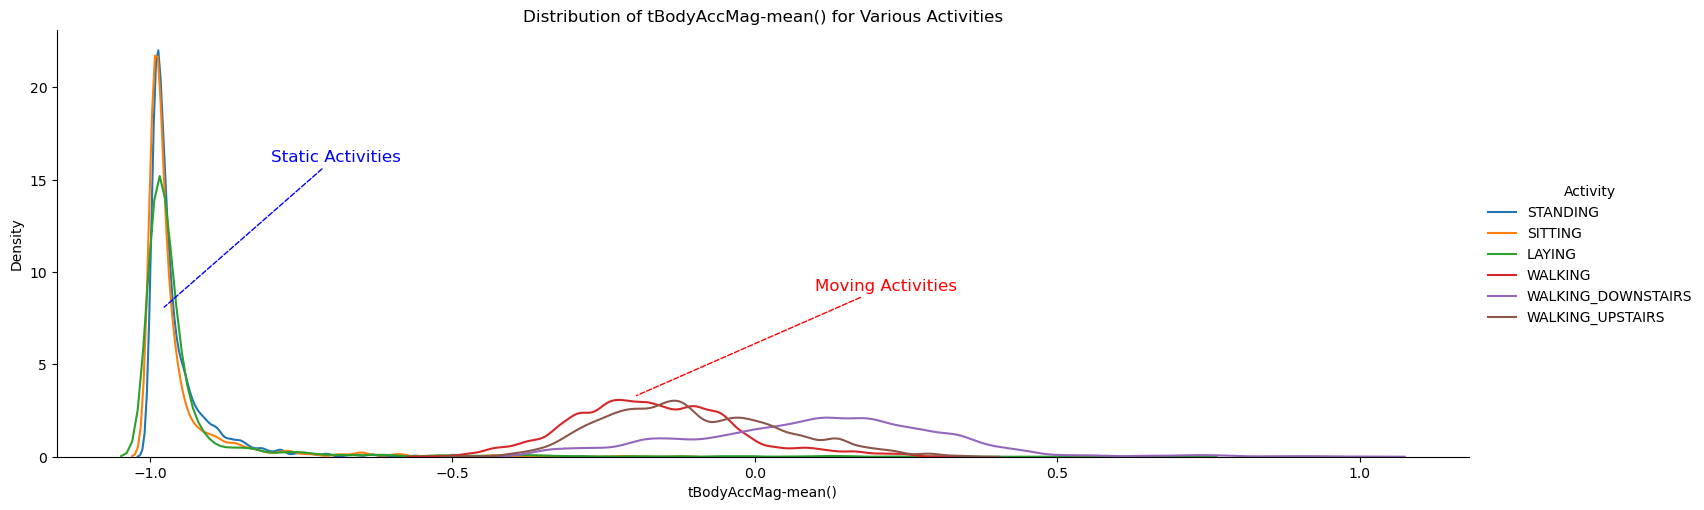

In [17]:
facetgrid = sns.FacetGrid(df, hue='Activity', height=5, aspect=3)
facetgrid.map(sns.kdeplot, 'tBodyAccMag-mean()', bw_adjust=0.5, common_norm=False).add_legend()

# Annotate static activities
plt.annotate("Static Activities", xy=(-0.98, 8), xytext=(-0.8, 16),
             arrowprops={'arrowstyle': '-', 'ls': 'dashed', 'color': 'blue'}, fontsize=12, color='blue')

# Annotate moving activities
plt.annotate("Moving Activities", xy=(-0.2, 3.25), xytext=(0.1, 9),
             arrowprops={'arrowstyle': '-', 'ls': 'dashed', 'color': 'red'}, fontsize=12, color='red')
plt.title("Distribution of tBodyAccMag-mean() for Various Activities")
plt.show()

### Static Activities and Moving Activities Acceleration

It can be observed that, as expected, the moving activities has a larger body acceleration magnitude mean that the static activities. Additionally, the data for moving activities is normally distributed with a long tail.

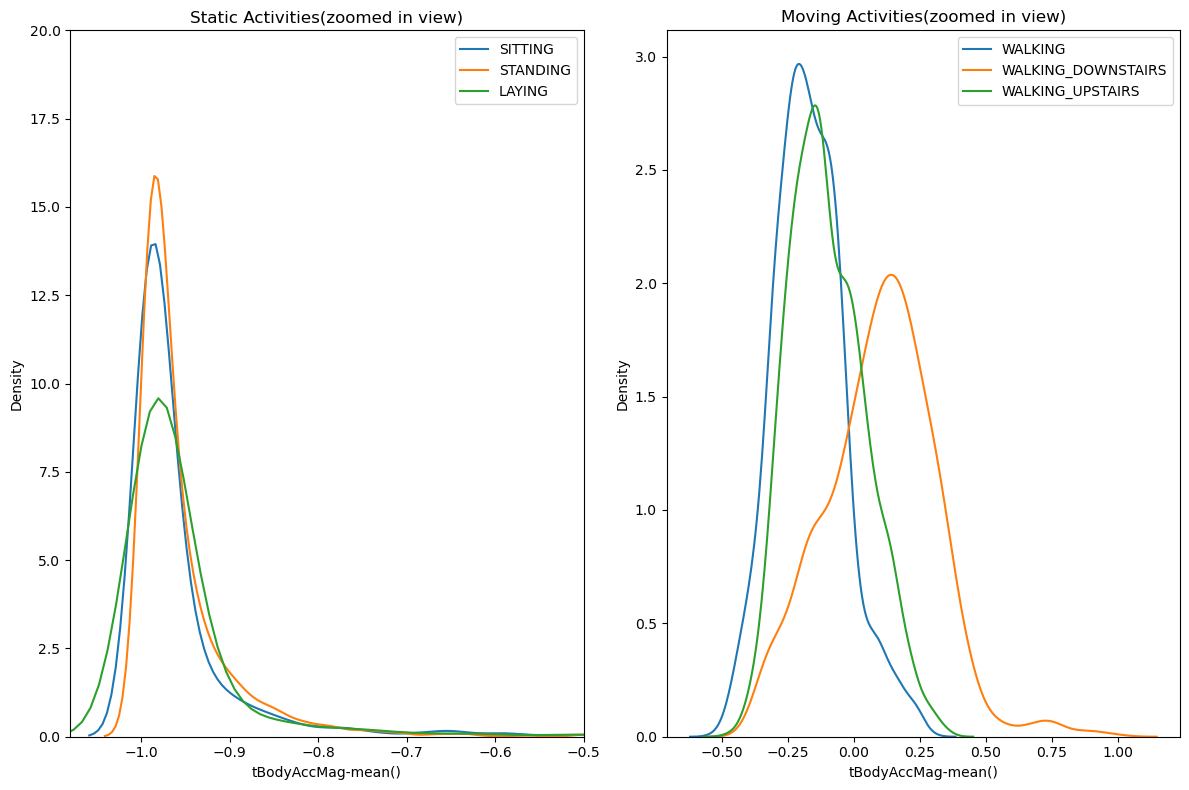

In [18]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(zoomed in view)")
sns.distplot(df[df["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'SITTING')
sns.distplot(df[df["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'STANDING')
sns.distplot(df[df["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'LAYING')
plt.axis([-1.08, -0.5, 0, 20])
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.title("Moving Activities(zoomed in view)")
sns.distplot(df[df["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING')
sns.distplot(df[df["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'WALKING_DOWNSTAIRS')
sns.distplot(df[df["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING_UPSTAIRS')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Acceleration Boxplot Across Activities

The box plot shows the analysis of the tBodyAccMag-mean() in different activities which reveals a distinct pattern. Specifically, when the tBodyAccMag-mean() is less than -0.8, the activity is typically one of the following: Standing, Sitting, or Laying. This implies that lower levels of body acceleration are linked with activities in which the users remains relatively immobile. Meanwhile, when the tBodyAccMag-mean() is greater than -0.6, the activities are likely to involve movement, such as Walking, Walking Downstairs, or Walking Upstairs. The variance reflects a slight rise in body acceleration when the individual walks in multiple directions.

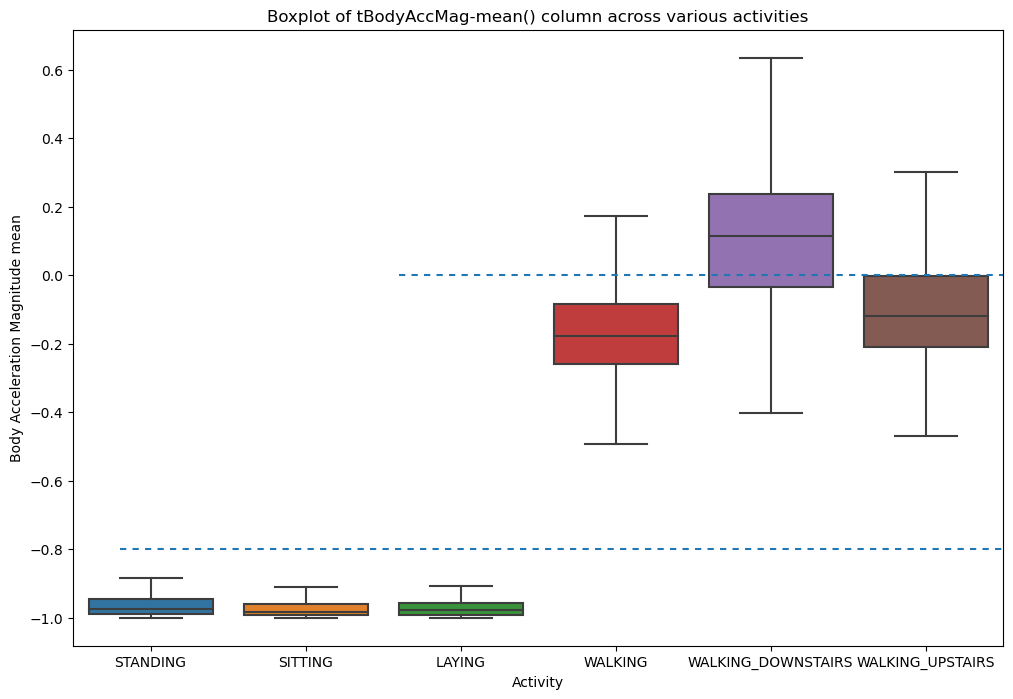

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x = "Activity", y="tBodyAccMag-mean()", data = df, showfliers = False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y = -0.8, xmin = 0.05, dashes = (3,3))
plt.axhline(y= 0.0, xmin = 0.35, dashes=(3,3))
plt.show()

### Gyroscope for Various Activities

The line graph illustrates the distribution of the angle(tBodyGyroMean,gravityMean) in different activities. The static activities have narrow distributions, indicating stable body orientations and the moving activities have larger and more complicated distributions, which represent shifting orientations during motion. It can also be seen in the line graph that the static activities (standing, sitting, laying) are place or ranging on the center axis while the moving activities (walking, walking downstairs, walking upstairs) are in motion between negative and shifting to positive axis. 

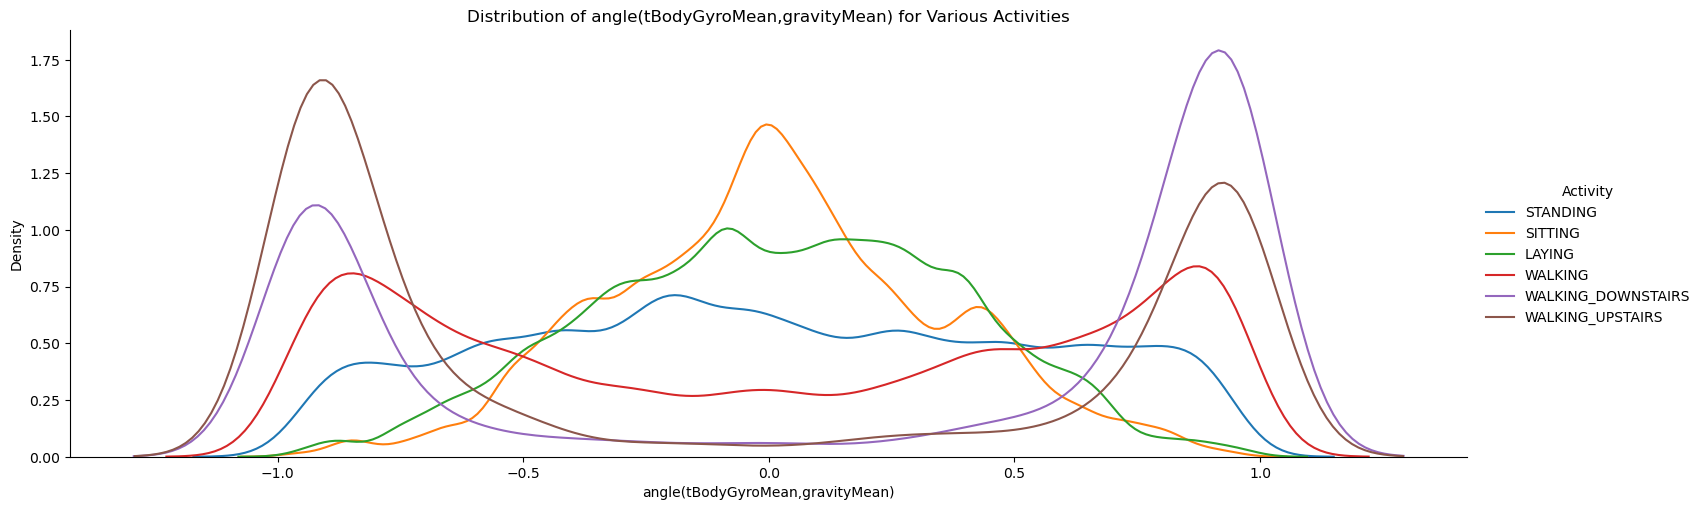

In [20]:
facetgrid = sns.FacetGrid(df, hue='Activity', height=5, aspect=3)
facetgrid.map(sns.kdeplot, 'angle(tBodyGyroMean,gravityMean)', bw_adjust=0.5, common_norm=False).add_legend()

# Annotate static activities
plt.annotate("Static Activities", xy=(-0.98, 8), xytext=(-0.8, 16),
             arrowprops={'arrowstyle': '-', 'ls': 'dashed', 'color': 'blue'}, fontsize=12, color='blue')

# Annotate moving activities
plt.annotate("Moving Activities", xy=(-0.2, 3.25), xytext=(0.1, 9),
             arrowprops={'arrowstyle': '-', 'ls': 'dashed', 'color': 'red'}, fontsize=12, color='red')
plt.title("Distribution of angle(tBodyGyroMean,gravityMean) for Various Activities")
plt.show()

### Static Activities and Moving Activities Gyroscope
The zoomed in line graph for the static activities emphasizes a concentrated movement, implying a consistent body orientation of being still. The distinction between laying, standing, sitting underscores the notion that the angle relative to gravity is a strong indicator of the "lying down" posture. Contrasting to the moving activities, in which it highlights a forward lean in downstairs and the a repetitive pattern in upstairs. 

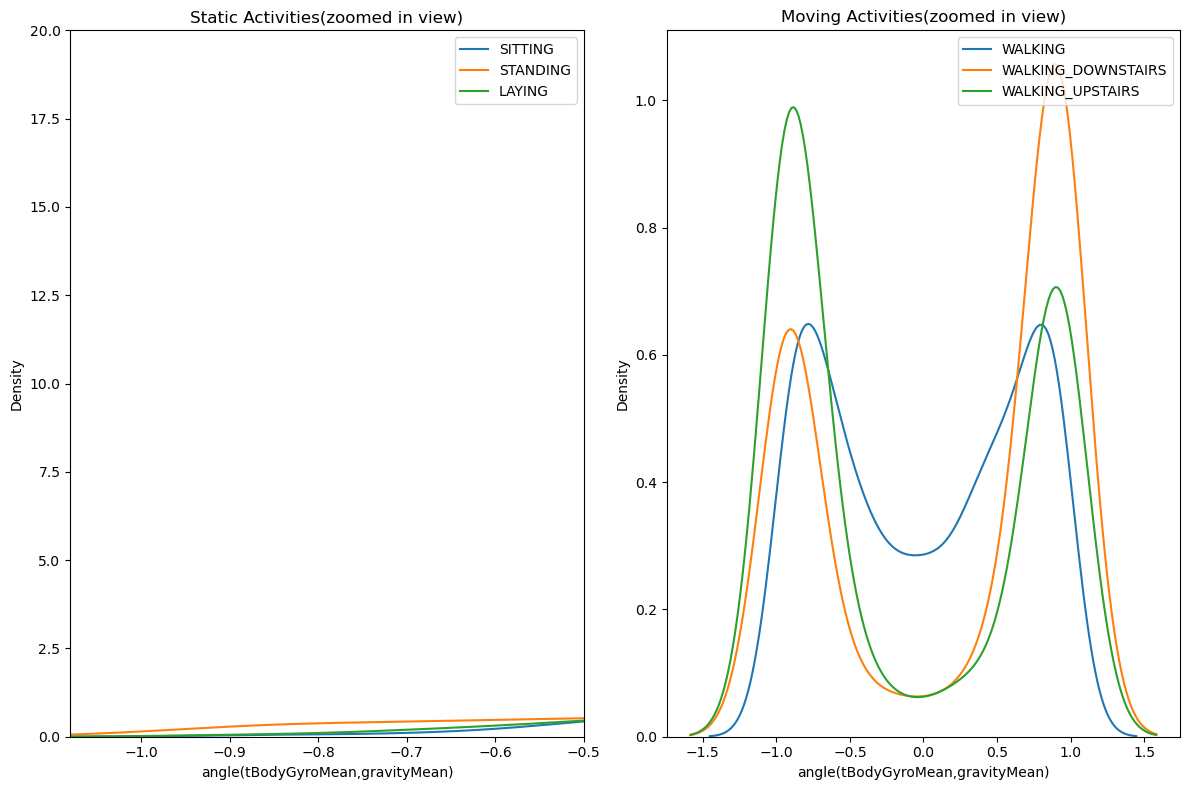

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(zoomed in view)")
sns.distplot(df[df["Activity"]=="SITTING"]['angle(tBodyGyroMean,gravityMean)'],hist = False, label = 'SITTING')
sns.distplot(df[df["Activity"]=="STANDING"]['angle(tBodyGyroMean,gravityMean)'],hist = False,label = 'STANDING')
sns.distplot(df[df["Activity"]=="LAYING"]['angle(tBodyGyroMean,gravityMean)'],hist = False, label = 'LAYING')
plt.axis([-1.08, -0.5, 0, 20])
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.title("Moving Activities(zoomed in view)")
sns.distplot(df[df["Activity"]=="WALKING"]['angle(tBodyGyroMean,gravityMean)'],hist = False, label = 'WALKING')
sns.distplot(df[df["Activity"]=="WALKING_DOWNSTAIRS"]['angle(tBodyGyroMean,gravityMean)'],hist = False,label = 'WALKING_DOWNSTAIRS')
sns.distplot(df[df["Activity"]=="WALKING_UPSTAIRS"]['angle(tBodyGyroMean,gravityMean)'],hist = False, label = 'WALKING_UPSTAIRS')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Boxplot of Gyroscope Across Activities

The box plot shows the analysis of the angle(tBodyGyroMean,gravityMean) in different activities which reveals a distinct pattern. The static activities shows a less angle fluctuation as compared to moving activities which showcases a closer range to 0. While the moving activites have an increased diveristy of both negative and positive angles. 

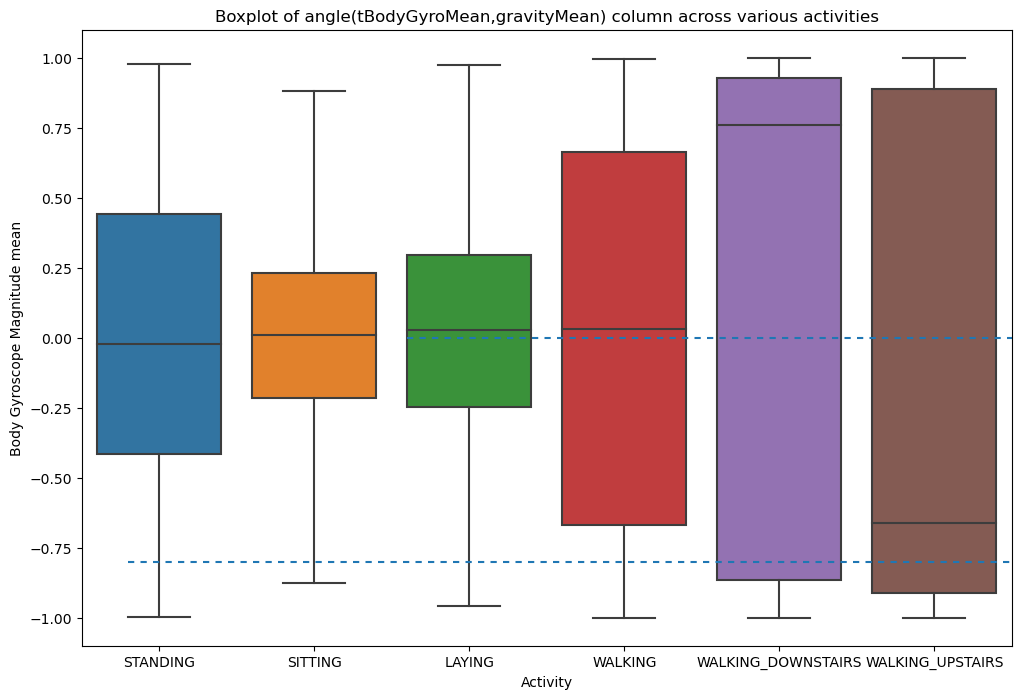

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(x = "Activity", y="angle(tBodyGyroMean,gravityMean)", data = df, showfliers = False)
plt.ylabel('Body Gyroscope Magnitude mean')
plt.title("Boxplot of angle(tBodyGyroMean,gravityMean) column across various activities")
plt.axhline(y = -0.8, xmin = 0.05, dashes = (3,3))
plt.axhline(y= 0.0, xmin = 0.35, dashes=(3,3))
plt.show()

***
***